In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from Networkmodel import NetworkModel_org, HopField

In [7]:
class NetworkModel(NetworkModel_org):
    def task_condition(self):
        self.condition = np.array([1,2,3,4,5,6]) 
        self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [1], 5: [1], 6: [2]}
        self.initial = 1
        self.terminal = [4,5]
        self.prob = 0.8
        self.stmdict = {1: [1], 2: [2.1,2.2], 3: [3], 4:[4], 5:[5], 6: [6]}
        self.cortex_calc = [1,6]
        self.stmindex = {1:0, 2:int(np.random.rand() < self.prob), 3:0, 4:0, 5:0, 6:0}
        self.swblock = 30
        self.HFregister = dict()
        self.condact = {i:[] for i in self.condition}
        for key,val in self.stmdict.items():
            for s in val:
                tmp = np.zeros(self.nstm)
                tmp[np.sort(np.random.choice(len(tmp), int(len(tmp)/2), replace = False))] = 1  
                self.HFregister[s] = tmp

    def check_rwd(self, result, count):
        if not result[-1]["cond"] in self.terminal:
            return 0
        swmode = np.mod(np.floor(count/self.swblock),2)
        tmp1 = sum([result[i]["infcond"] for i in range(len(result))], [])
        tmp2 = [result[i]["cond"] for i in range(len(result))]
        initial = 1 if np.mod(np.floor((count+1)/self.swblock),2) == 0 else 6
        if initial != self.initial:
            self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [initial], 5: [initial], 6: [2]}
            self.initial = None
        prob = self.prob if initial == 1 else 1-self.prob
        if self.stmindex[2] == 0:
            self.stmindex[2] = 0 if np.random.rand() < prob else 1
            return int(4 in tmp2) if swmode == 0 else int(5 in tmp2)
        else:
            self.stmindex[2] = 0 if np.random.rand() < prob else 1
            return int(5 in tmp2) if swmode == 0 else int(4 in tmp2)


In [8]:
allresult = dict()
x = 0

In [9]:
hp = NetworkModel(200,1000,300,1200,8)
result = []
HCprev = []
cond = None
for i in range(90):
    result_,HCprev,cond = hp.process(i, HCprev, cond, verbose = True)
    result.append(result_)
allresult[x] = result
x += 1

trial 0 stmindex 0 HCprev []
HCprev []
think 0-0 [178]
plan 1 [] 2
init 1 2
memo 1 0
HF2HC [29] 1-0
HC2HF [29] 1-0
pkup [29] 1-0
choose [1. 2.] [29 58]
stmremap [-1] [58] []
HCprev [[58]]
think 0-0 [205]
plan 2 [] 4
init 2 4
memo 2 0
HF2HC [123] 2.1-0
HC2HF [123] 2.1-0
pkup [123] 2.1-0
HC2HF [58] [2.1 0. ]
remove [1.  2.1 4. ] [ 29  58 123 270]
HF2HC [123] 2.1-0
HC2HF [123] 2.1-0
HCprev [array([270], dtype=int64)]
think 0-0 [125]
plan 4 [] 1
init 4 1
memo 4 0
HF2HC [230] 4-0
HC2HF [230] 4-0
pkup [230] 4-0
choose [4. 1.] [230 170]
HC2HF [270] 4-0
HF2HC [230] 4-0
HC2HF [230] 4-0
check trans [4.0] {}
['c:1', 'n:4.0', 'e:0.0', 'i:[1.0, 2.1]', 'p:[1.0, 2.0]', 'H:[ 29  58 123 270]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.0', 'i:[4.0, 1.0]', 'p:[4.0, 1.0]', 'H:[270 230 170]', 'a:4-0', 'r:1', "p:['1-0', '2.1-0', '4-0']"]

trial 1 stmindex 1 HCprev 170
HCprev [array([170], dtype=int64)]
external stm 1
think 1-0 [29]
choose [1.  2.1 4. ] [ 29  58 123 270 230 170]
stmremap [123] [58] [123]
HCprev [[

check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.8031255956592774', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[170  29  58 123 270 230 170]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.8031255956592774', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[170  29  58 123 270 230 170]', 'a:4-0', 'r:1', "p:['1-0', '2.1-0', '4-0', '2.2-1', '5-0']"]

trial 16 stmindex 0 HCprev 170
HCprev [array([170], dtype=int64)]
think 1-0 [29]
choose [1.  2.1 4. ] [ 29  58 123 270 230 170]
HC2HF [170] 1-0
HF2HC [29] 1-0
HC2HF [29] 1-0
tested ['1.0-0', '2.1-0', '4.0-0', '2.2-1', '5.0-0']
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.8326567563103858', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[170  29  58 123 270 230 170]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.8326567563103858', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[170  29  58 123 270 230 170]', 'a:4-0', 'r:1', "p:['1-0', '2.1-0', '4-0', '2.2-1', '5-0']"]

trial 17 stmindex 0 HCprev 170
HCprev [array([170], dtype=int64)]
think 1-0 [

external stm 6
think 6-0 [262]
external stm 6
think 6-0 [262]
external stm 6
think 6-0 [262]
external stm 6
think 6-0 [262]
external stm 6
think 6-0 [262]
external stm 6
think 6-0 [262]
external stm 6
think 6-0 [262]
external stm 6
think 6-0 [262]
plan 2 [4] 5
actremapping [262 158   2  68] [262 158   2 141]
choose [6.  2.1 5. ] [262 158   2 141]
stmremap [2] [158] [2]
HCprev [[158]]
think 0-0 [31]
plan 2 [] 4
init 2 4
memo 2 3
HF2HC [47] 2.2-3
HC2HF [47] 2.2-3
pkup [47] 2.2-3
HC2HF [158] [2.2 3. ]
remove [6.  2.2 4. ] [262 158  47 289]
HF2HC [47] 2.2-3
HC2HF [47] 2.2-3
HCprev [array([289], dtype=int64)]
think 0-0 [298]
plan 4 [] 6
init 4 6
memo 4 2
HF2HC [134] 4-2
HC2HF [134] 4-2
pkup [134] 4-2
choose [4. 6.] [134  96]
HC2HF [289] 4-2
HF2HC [134] 4-2
HC2HF [134] 4-2
check trans [4.0] {}
['c:6', 'n:4.0', 'e:0', 'i:[6.0, 2.2]', 'p:[6.0, 2.1, 5.0]', 'H:[ 60 262 158  47 289]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.0', 'i:[4.0, 6.0]', 'p:[4.0, 6.0]', 'H:[289 134  96]', 'a:4-2', 'r:1', "p:['1

think 2.1-2 [2]
HC2HF [2] [2.1 2. ]
remove [6.  2.1] [262 158   2 141]
HF2HC [2] 2.1-2
HC2HF [2] 2.1-2
HCprev [array([262], dtype=int64), array([158], dtype=int64), array([2], dtype=int64), array([141], dtype=int64)]
think 0-0 [105]
plan 2 [] 5
init 2 5
memo 2 4
HF2HC [234] 2.1-4
HC2HF [234] 2.1-4
pkup [234] 2.1-4
choose [2.1 5. ] [234 273]
HC2HF [141] 2.1-4
HF2HC [234] 2.1-4
HC2HF [234] 2.1-4
HCprev [array([273], dtype=int64)]
think 0-0 [169]
plan 5 [] 6
init 5 6
memo 5 1
HF2HC [46] 5-1
HC2HF [46] 5-1
pkup [46] 5-1
choose [5. 6.] [ 46 115]
HC2HF [273] 5-1
HF2HC [46] 5-1
HC2HF [46] 5-1
check trans [5.0] {}
['c:6', 'n:2.1', 'e:0.8326567563103858', 'i:[6.0, 2.1]', 'p:[6.0, 2.2, 4.0]', 'H:[ 96 262 158   2 141]', 'a:6-0', 'r:0']
['c:2', 'n:5.0', 'e:0.0', 'i:[2.1]', 'p:[2.1, 5.0]', 'H:[262 158   2 141 234 273]', 'a:2.1-4', 'r:0']
['c:5', 'n:6', 'e:0.0', 'i:[5.0, 6.0]', 'p:[5.0, 6.0]', 'H:[273  46 115]', 'a:5-1', 'r:1', "p:['1-0', '2.1-0', '4-0', '2.2-1', '5-0', '6-0', '2.1-2', '4-1', '2.2-3

check trans [6.0, 2.2, 4.0, 6.0] {}
['c:6', 'n:4.0', 'e:0.9612404689154856', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.2, 4.0]', 'H:[ 96 262 158  47 289 134  96]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.9612404689154856', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.2, 4.0]', 'H:[ 96 262 158  47 289 134  96]', 'a:4-2', 'r:1', "p:['1-0', '2.1-0', '4-0', '2.2-1', '5-0', '6-0', '2.1-2', '4-1', '2.2-3', '4-2', '2.1-4', '5-1']"]

trial 57 stmindex 0 HCprev 96
HCprev [array([96], dtype=int64)]
think 6-0 [262]
choose [6.  2.2 4. ] [262 158  47 289 134  96]
stmremap [47] [158] [ 2 47]
HCprev [[2]]
think 2.1-2 [2]
HC2HF [2] [2.1 2. ]
remove [6.  2.1 4. ] [262 158   2  68]
HF2HC [2] 2.1-2
HC2HF [2] 2.1-2
HCprev [array([262], dtype=int64), array([158], dtype=int64), array([2], dtype=int64), array([68], dtype=int64)]
think 4-1 [297]
choose [4. 6.] [297  60]
HC2HF [68] 4-1
HF2HC [297] 4-1
HC2HF [297] 4-1
check trans [6.0, 2.2, 2.1, 4.0, 6.0] {}
['c:6', 'n:4.0', 'e:0.9670543985781628', 'i:[6.0, 2.1, 4.0]', 'p:[6.0, 2.2, 4.0]

think 1-0 [29]
choose [1.  2.1 4. ] [ 29  58 123 270 230 170]
HC2HF [170] 1-0
HF2HC [29] 1-0
HC2HF [29] 1-0
tested ['1.0-0', '2.1-0', '4.0-0', '2.2-3', '2.2-1', '6.0-0', '5.0-0', '4.0-2']
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.9670543985781628', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[170  29  58 123 270 230 170]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.9670543985781628', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[170  29  58 123 270 230 170]', 'a:4-0', 'r:1', "p:['1-0', '2.1-0', '4-0', '2.2-1', '5-0', '6-0', '2.1-2', '4-1', '2.2-3', '4-2', '2.1-4', '5-1']"]

trial 73 stmindex 0 HCprev 170
HCprev [array([170], dtype=int64)]
think 1-0 [29]
choose [1.  2.1 4. ] [ 29  58 123 270 230 170]
HC2HF [170] 1-0
HF2HC [29] 1-0
HC2HF [29] 1-0
tested ['1.0-0', '2.1-0', '4.0-0', '2.2-3', '2.2-1', '6.0-0', '5.0-0', '4.0-2']
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.9719962387914384', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[170  29  58 123 270 230 170]', '

HC2HF [255] 1-0
HF2HC [29] 1-0
HC2HF [29] 1-0
tested ['1.0-0', '2.1-0', '4.0-0', '2.2-3', '2.2-1', '6.0-0', '5.0-0', '4.0-2']
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.9719962387914384', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[255  29  58 123 270 230 170]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.9719962387914384', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[255  29  58 123 270 230 170]', 'a:4-0', 'r:1', "p:['1-0', '2.1-0', '4-0', '2.2-1', '5-0', '6-0', '2.1-2', '4-1', '2.2-3', '4-2', '2.1-4', '5-1']"]

trial 86 stmindex 0 HCprev 170
HCprev [array([170], dtype=int64)]
think 1-0 [29]
choose [1.  2.2 5. ] [ 29  58  40  20  85 255]
stmremap [40] [58] [ 40 123]
HCprev [[123]]
think 2.1-0 [123]
HC2HF [123] [2.1 0. ]
remove [1.  2.1 4. ] [ 29  58 123 270 230 170]
HF2HC [123] 2.1-0
HC2HF [123] 2.1-0
tested ['1.0-0', '2.1-0', '4.0-0', '2.2-3', '2.2-1', '6.0-0', '5.0-0', '4.0-2']
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.9761968029727226', 'i:[1.0, 2.1, 4.0]'

In [5]:
num = 40
trialnum = 120
allresult = dict() #np.zeros((num,trialnum))*np.nan
x = 0
errcounter = 0
while x < num:
    print(x)
    hp = NetworkModel(200,1000,300,1200,8)
    result = []
    HCprev = []
    cond = None
    try:
        for i in range(trialnum):
            result_,HCprev,cond = hp.process(i, HCprev, cond,verbose = False)
            result.append(result_)
        allresult[x] = result
    except:
        print("error",x)
        allresult[x] = result
        errcounter += 1
    #if result[-1][-1]["rwd"] == 0:
    #    break
    x += 1
print(errcounter)

0
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
init 6 2
init 2 5
init 5 6
actremapping [140  64 240 121] [140  64 240 128]
init 4 6
init 2 5
init 5 6
1
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
2
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
actremapping [275 259 238   5] [275 259 238 246]
init 4 1
actremapping [275 259 137 207] [275 259 137 267]
init 2 4
init 4 1
init 6 2
init 2 5
init 5 6
actremapping [126  11   6  35] [126  11   6 220]
init 4 6
init 2 5
init 5 6
init 1 2
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
3
init 1 2
init 2 4
init 4 1
actremapping [ 26 254 144  52] [ 26 254 144 158]
init 2 4
init 4 1
init 2 4
init 4 1
actremapping [171 295] [171 141]
init 5 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
4
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
actremapping [176 119  92  57] [176 119  92 288]
init 4 1
actremapping [ 13 247] [ 13 219]
init 5 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
5
init 1 2
init 2 4
init 4 1
actrema

22
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
init 2 4
init 4 1
actremapping [ 41  13 161 124] [ 41  13 161 199]
init 5 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
23
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
actremapping [178 256] [178 250]
init 4 1
init 6 2
init 2 5
init 5 6
init 2 5
init 5 6
actremapping [111  37] [111 190]
init 4 6
actremapping [218 277] [218 133]
init 5 1
24
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
actremapping [ 11  91  97 159] [11 91 97 54]
init 2 5
init 5 6
init 6 2
init 2 5
init 5 6
actremapping [171 205 246 278] [171 205 246 209]
init 4 6
init 2 5
init 5 6
25
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
init 6 2
init 2 5
init 5 6
actremapping [166 226  79 147] [166 226  79 265]
init 4 6
init 2 5
init 5 6
26
init 1 2
init 2 5
init 5 1
actremapping [233 122 123 138] [233 122 123   5]
init 4 1
init 2 5
init 5 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
27
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
ini

In [ ]:
with open("./pkls/switch_prob_2cond_0.8.pkl", mode = "wb") as f:
    pickle.dump(allresult, f)

In [10]:
with open("./pkls/switch_prob_2cond_0.8.pkl", mode = "rb") as f:
    allresult = pickle.load(f)
num = len(allresult)
trialnum = np.max([len(allresult[x]) for x in range(num)])

In [11]:
rwdrate = np.zeros((num,trialnum))
for x in range(num):
    tmp = [res[-1]["rwd"] for r, res in enumerate(allresult[x])]
    rwdrate[x,:len(tmp)] = tmp

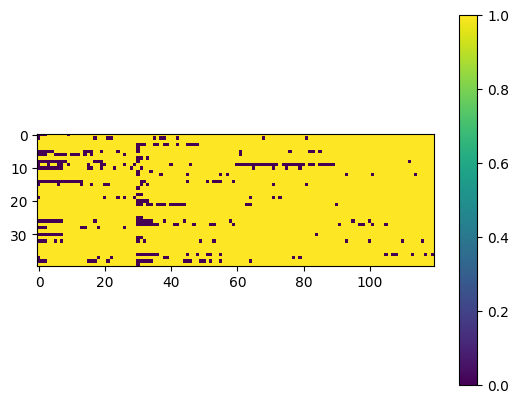

In [12]:
plt.imshow(rwdrate)
plt.colorbar()

(-5.0, 105.0)

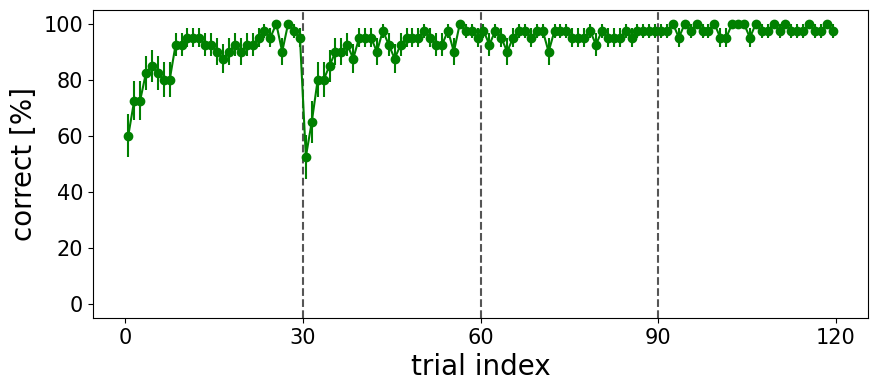

In [13]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-5,105], "--",color = "#555555")
plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(num),fmt="go-")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("correct [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
#plt.savefig("./figure/switch_prob_2cond_{}_correct.png".format(hp.prob), bbox_inches = "tight")

In [29]:
allresult[0][0][0]

{'cond': 1,
 'nextcond': 5.0,
 'exprwd': 0.0,
 'infcond': [1.0, 2.1],
 'preinf': [1.0, 2.0],
 'HCtrans': array([  8,  99, 239,  14], dtype=int64),
 'act': '1-0',
 'rwd': 0}

In [41]:
inflen = np.zeros((num,trialnum))*np.nan
for x in range(num):
    tmp = []
    for r in range(len(allresult[x])):
        infcond = allresult[x][r][0]["infcond"]
        preinf = allresult[x][r][0]["preinf"]
        ln = int((len(allresult[x][r][-1]["HCtrans"])-1)/2)
        if set(infcond) != set(preinf):
            for y in range(np.min([len(infcond), len(preinf)])):
                if infcond[y] == preinf[y] and ln > 1:
                    ln -= 1
                else:
                    break
        tmp.append(ln)
    #tmp = [int((len(allresult[x][r][-1]["HCtrans"])-1)/2) for r in range(len(allresult[x]))]
    inflen[x,:len(tmp)] = tmp

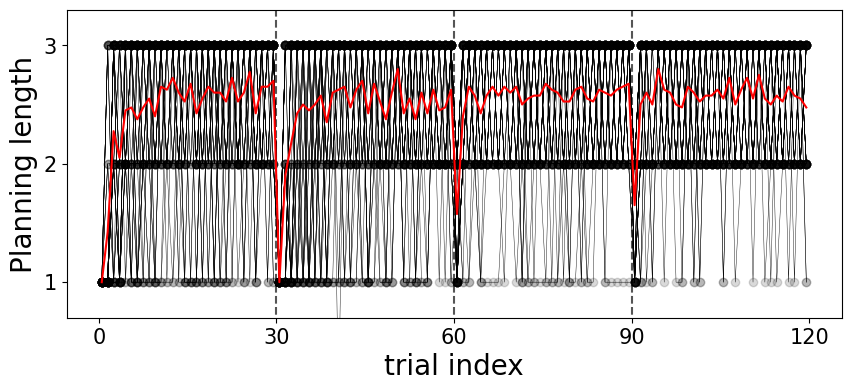

In [42]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [0,5], "--",color = "#555555")
for i in range(num):
    plt.plot(np.arange(trialnum), inflen[i,:]+np.random.rand(trialnum)*0, "ko-", linewidth = 0.3, markerfacecolor = (0,0,0,0.15))
    #plt.plot(np.arange(trialnum), inflen[i,:]+np.random.rand(trialnum)*0, "ko-", linewidth = 0.5)
plt.plot(np.arange(trialnum), np.nanmean(inflen,0), "r")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("Planning length", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks([1,2,3],fontsize = 15)
plt.ylim([.7,3.3])
plt.savefig("./figure/switch_prob_2cond_{}_inflen.png".format(hp.prob), bbox_inches = "tight")

In [ ]:
preratio = np.zeros((num, trialnum, 2))*np.nan
for x in range(num):
    tmp = [2.1 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 for r in range(len(allresult[x]))] 
    tmp2 = [2.2 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 for r in range(len(allresult[x]))] 
    preratio[x, :len(tmp), 0] = tmp
    preratio[x, :len(tmp), 1] = np.array(tmp2)

In [ ]:
preratio2 = np.zeros((num, trialnum, 4))*np.nan
for x in range(num):
    tmp0 = [1 if 2.1 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 \
            and allresult[x][r][0]["preinf"][0] == 1 else 0 for r in range(len(allresult[x]))] 
    tmp1 = [1 if 2.2 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 \
            and allresult[x][r][0]["preinf"][0] == 1 else 0 for r in range(len(allresult[x]))] 
    tmp2 = [1 if 2.1 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 \
            and allresult[x][r][0]["preinf"][0] == 6 else 0 for r in range(len(allresult[x]))] 
    tmp3 = [1 if 2.2 in allresult[x][r][0]["preinf"] and len(allresult[x][r][0]["preinf"])>=3 \
            and allresult[x][r][0]["preinf"][0] == 6 else 0 for r in range(len(allresult[x]))] 
    preratio2[x, :len(tmp0), 0] = tmp0
    preratio2[x, :len(tmp1), 1] = tmp1
    preratio2[x, :len(tmp2), 2] = tmp2
    preratio2[x, :len(tmp3), 3] = tmp3

In [ ]:
lbls = ["C2α","C3α","C2β","C3β"]
clrs = ["#bc0000","#0000bc", "#dc4400","#4055ac"]
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-10,110], "--",color = "#555555")
for i in range(4):
    h0 = plt.errorbar(np.arange(trialnum), np.nanmean(preratio2[:,:,i],0)*100, \
                  100*np.nanstd(preratio2[:,:,i],0)/np.sqrt(num),fmt="o-", color=clrs[i],label = lbls[i])
plt.legend(bbox_to_anchor=(1,1), fontsize=15)
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("planning rate [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
plt.savefig("./figure/switch_prob_2cond_{}_preratio.png".format(hp.prob), bbox_inches = "tight")

In [ ]:
choicerate = np.zeros((num,trialnum,2))*np.nan
for x in range(num):
    for r,res in enumerate(allresult[x]):
        rwd,cnd,init = res[-1]["rwd"], res[-1]["cond"], res[0]["cond"]
        if init == 1:
            choice = (cnd == 4)*rwd + (cnd == 5)*(1-rwd)
        else:
            choice = (cnd == 5)*rwd + (cnd == 4)*(1-rwd)
        if choice:
            choicerate[x,r,0] = (cnd == 4)
        else:
            choicerate[x,r,1] = (cnd == 4)

In [ ]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-10,110], "--",color = "#555555")
h1 = plt.errorbar(np.arange(trialnum), np.nanmean(choicerate[:,:,0],0)*100, \
                  100*np.nanstd(choicerate[:,:,0],0)/np.sqrt(num),fmt="ro-", label = "S2")
h2 = plt.errorbar(np.arange(trialnum), np.nanmean(choicerate[:,:,1],0)*100, \
                  100*np.nanstd(choicerate[:,:,1],0)/np.sqrt(num),fmt="bo-", label = "S3")
plt.legend(fontsize=15)
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("prob. of choice S4 [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
plt.savefig("./figure/switch_prob_2cond_{}_choice.png".format(hp.prob), bbox_inches = "tight")

In [ ]:
pred1 = np.array([np.nanmean(preratio[i,60:90,:],0) for i in range(num)
                if not all(np.isnan(preratio[i,60:90,:]).ravel())])
pred2 = np.array([np.nanmean(preratio[i,90:120,:],0) for i in range(num)
                if not all(np.isnan(preratio[i,90:120,:]).ravel())])
fig=plt.figure(figsize=(2.5,5))
ax=fig.add_subplot(111)
bp=ax.boxplot(pred1[:,0]-pred1[:,1],patch_artist=True,medianprops=dict(color='black', linewidth=1),
             labels = ["S0"],widths=0.4,positions = [1])
bp2=ax.boxplot(pred2[:,0]-pred2[:,1],patch_artist=True,medianprops=dict(color='black', linewidth=1),
             labels = ["S1"],widths=0.4,positions = [2])
colors=['#3cb371', '#dF1493']
plt.xticks(fontsize = 20)
plt.yticks([-1,0,1],fontsize = 20)
plt.ylim([-1.2,1.2])
# boxの色の設定

bp['boxes'][0].set(color='black', linewidth=1)  # boxの外枠の色
bp['boxes'][0].set_facecolor(colors[0]) # boxの色
bp2['boxes'][0].set(color='black', linewidth=1)  # boxの外枠の色
bp2['boxes'][0].set_facecolor(colors[1]) # boxの色
ax.tick_params(right=False, top=False, labelright=False, labeltop=False)
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig("./figure/switch_prob_2cond_{}_box.png".format(hp.prob), bbox_inches="tight")

In [ ]:
import scipy
scipy.stats.mannwhitneyu(pred1[:,0]-pred1[:,1],pred2[:,0]-pred2[:,1])